# Calibrating a Camera

In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

I can read in all the fcalibration images by importing the glob API, which helps read in images with a consistent file name, like GOPR0032, GOPR0033, and so on.

In [3]:
import glob
%matplotlib inline

# Read in a calibration image
images = glob.glob('./calibration_wide/GOPR*.jpg')

In [4]:
# Arrays to store object points and image points from all the images

objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

In [5]:
# Prepare object points, like (0,0,0),(2,0,0),...,(7,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2) # x, y coordinates

I'll iterate through each image file, detecting corners and appending points to the object and image points arrays.
Then later, we'll be able to use the object points and image points to calibrate this camera.

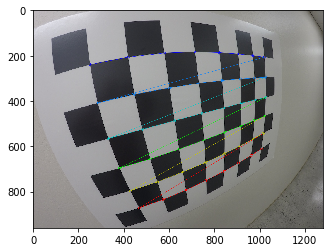

In [6]:
for fname in images:
    # read in each image
    img = mpimg.imread(fname)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    
    # If corners are found, add object points, image points
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        # draw and display the corners
        img = cv2.drawChessboardCorners(img, (8,6), corners, ret)
        plt.imshow(img)